# Sleep Wake Dynamics  Prior and After Exposure to Chronic Stress

# Abstract

We showed in our previous publication how sleep disturbances prior to exposure to chronic stress can predict the vulnerability to stress.  The following evidence was extracted from our data:

(a) Decrease in NREM average bout duration in Stress-Susceptible mice pre- and post-chronic stress

(b) Increase in number of transitions between NREM and Wake states in Stress-Susceptible mice pre- and post-chronic stress. (a) & (b) can be summarized as increased NREM sleep fragmentation in susceptible mice.

(c) Increase in number of transitions between NREM and Wake states and decreased average bout duration of NREM in resilient mice post exposure to stress

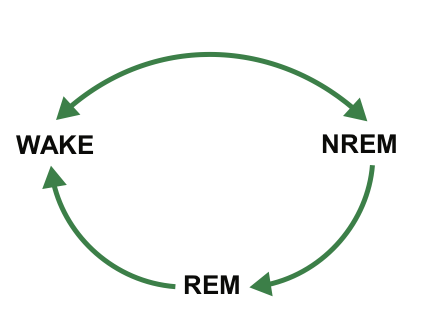

# Aim of the current investigation
By leveraging the statistical properties of the sleep and wake bouts distribution (exponential and power law respectively) and by stratifying the bouts based on their transitions, one could gain valuable insights into the network properties and dynamics in order to plan the next step of neural circuit-based investigation. 

# The state transitions we are focusing on:

1. NREM to Wake
2. NREM to REM

3. REM from NREM

4. Wake from NREM
5. Wake from REM

Other state transitions are rare and can be safely ignored in our analysis.

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ggplot import *
import seaborn as sns
import statsmodels.api as sm
import glob
import os

from sklearn import linear_model
from lifelines import KaplanMeierFitter

os.chdir('/Users/bmr225/Documents/PythonCodes/Survival_Data')

In [96]:
# List of functions used to plot the distributions
def load_data(phenotype,phase,condition):
    df = pd.read_csv(phenotype + "_"+ phase + "_" + condition + "_grouped.csv")
    return df

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

def grouping_data(df,direction,measure):
    if direction == 'To':
       df_res = df.groupby(['State_Label','Transition_to_label'])[measure].apply(list)
    elif direction =='From':
        df_res = df.groupby(['State_Label','Transition_from_label'])[measure].apply(list)
    else:
        df_res = df.groupby('State_Label')[measure].apply(list)
    return df_res

#Transition To: N-W, N-R, R-W, W-R... , from: WfN, WfR, NfR, NfW, 
def extract_list(df,state,transition): # df here is grouped.. 
    if transition =='None':
       l_res = df[state]
    else:
       l_res = df[state][transition]
    return l_res

######################################################################################################################
# Plotting functions
def plt_phenotypes_per_phase_cond(phenotype,phase, condition,state, direction, transition,measure):   
    # load, group, extract the list of interest
    df = load_data(phenotype,phase,condition)    
    df_grouped = grouping_data(df,direction,measure) 
    l_ = extract_list(df_grouped,state,transition) 
    X,Y = ecdf(l_)   
    # plot command
    _ = plt.xlabel('Duration [s]')
    _ = plt.ylabel('Cumulative Probability')
    _ = plt.plot(X,Y,marker='.',linestyle = 'none',label = phenotype)


# to loop over the 3 phenotypes
def plt_loop_over_phenotype(phase, condition,state, direction, transition,measure):
    for phenotype in ['Susceptible','Resilient','Control']:
        plt_phenotypes_per_phase_cond(phenotype,phase,condition,state, direction, transition,measure)
        plt.title(condition + "-" + "-" + phase + "-"+ transition)
        plt.legend(loc = 'lower right')
    plt.show()

# Plotting Cumulative Distribution Function of Vigilance States

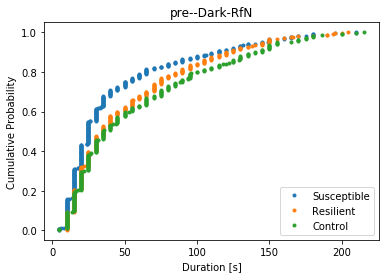

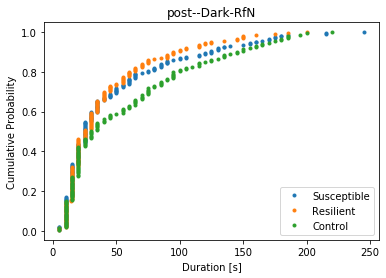

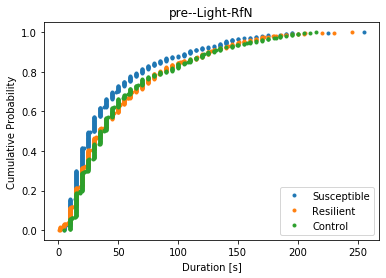

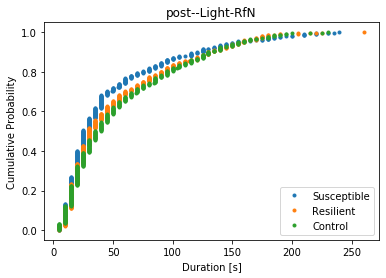

In [97]:
phase = ['Dark','Light']
condition =['pre','post']
direction = 'From'
state = 'REM'
transition = 'RfN'
measure = 'Duration'

for p in phase:
    for c in condition:
        plt_loop_over_phenotype(p, c,state, direction, transition,measure)

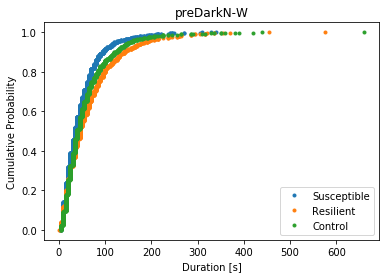

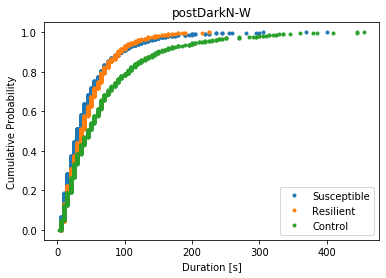

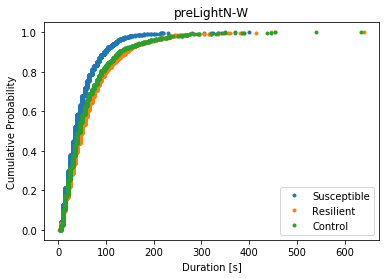

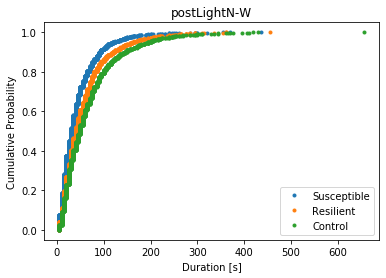

In [92]:
phase = ['Dark','Light']
condition =['pre','post']
direction = 'To'
state = 'NREM'
transition = 'N-W'
measure = 'Duration'

for p in phase:
    for c in condition:
        plt_loop_over_phenotype(p, c,state, direction, transition,measure)

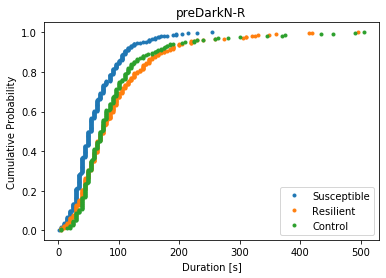

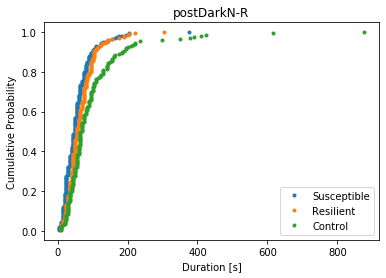

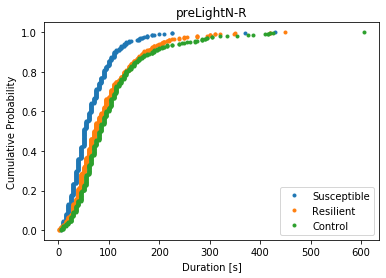

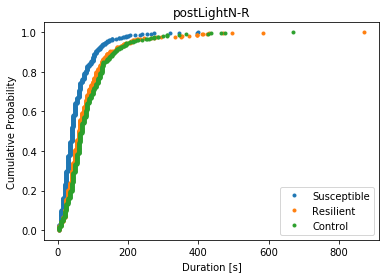

In [93]:
phase = ['Dark','Light']
condition =['pre','post']
direction = 'To'
state = 'NREM'
transition = 'N-R'
measure = 'Duration'

for p in phase:
    for c in condition:
        plt_loop_over_phenotype(p, c,state, direction, transition,measure)

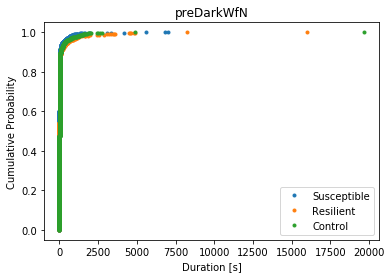

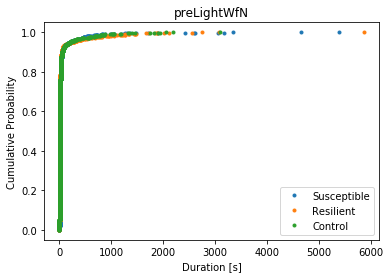

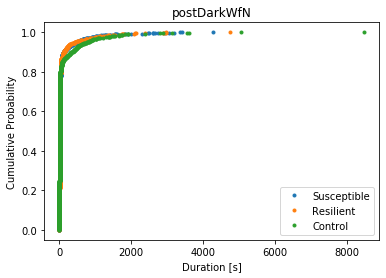

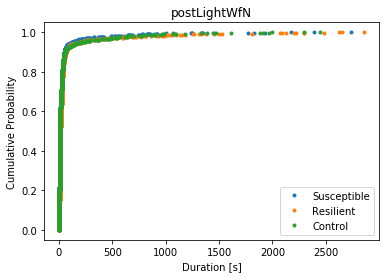

In [94]:
phase = ['Dark','Light']
condition =['pre','post']
direction = 'From'
state = 'Wake'
transition = 'WfN'
measure = 'Duration'

for c in condition:
    i = 1
    for p in phase:
        #_ = plt.subplot(2,1,i) 
        plt_loop_over_phenotype(p, c,state, direction, transition,measure)
        
plt.show()        
        

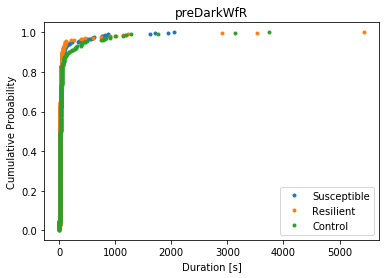

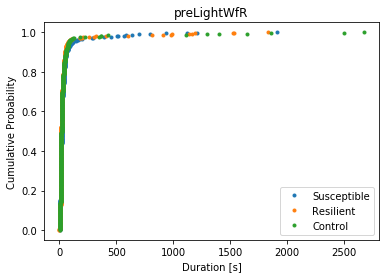

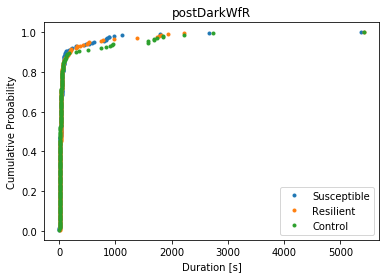

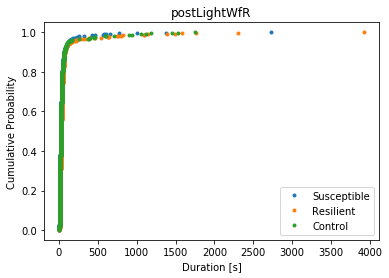

In [95]:
phase = ['Dark','Light']
condition =['pre','post']
direction = 'From'
state = 'Wake'
transition = 'WfR'
measure = 'Duration'


for c in condition:
    i = 1
    for p in phase:
        #_ = plt.subplot(2,1,i) 
        plt_loop_over_phenotype(p, c,state, direction, transition,measure)
        
plt.show()        
        

# Non parametric statistical Testing
Still need to perform non parametric statistical test comparisons between the distributions across the phenotypes using Kolmogorov-Smirnov test 

# % Duration, Count of states 

In [10]:
# Loading data frame of count, % count, total duration, % total duration of state transitions per mouse per phenotype per condition per phase
df_res = pd.read_csv('count+Dur_stateTransitions_0424.csv')


By plotting the cumulative distribution function of the following states: (1) NREM to Wake (2) NREM to REM (3) REM from NREM (4) Wake from NREM (5) Wake from REM, the following observations are made:
- Susceptible Mice: the distribution of state "NREM" to REM and "REM" from NREM are shifted to the left: higher probability of shorter state duration, pre- and post- stress during light and dark in comparison to control and/or resilient
- Susceptible Mice : the distribution of state "NREM" to wake is shifted to the left as well: higher probability of shorter state duration, pre-and post stress, during light and dark in comparison to one or both other phenotypes
- Resilient Mice: post chronic stress, during the light, only "NREM" to wake distribution shifted slightly to the left, or towards higher probability of shorter bouts duration. Both "NREM" to REM and "REM" to wake distribution were "resilient" post stress exposure. In other words, they remain shifted to the right relative to the distribution of the susceptible and similar to the distribution of stress-naive(control) mice. During the dark, however, the picture changed: the distribution of "NREM" to wake, "NREM" to REM and "REM" to wake shifted to the left, similar to the susceptible mice. 
- The distribution of the wake states, "Wake" from REM and "Wake" from NREM is comparable among all phenotypes.

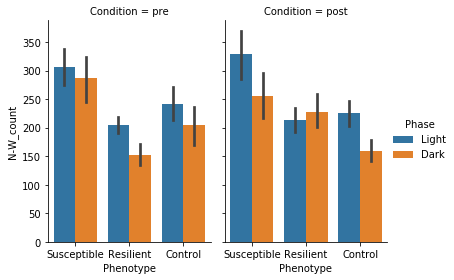

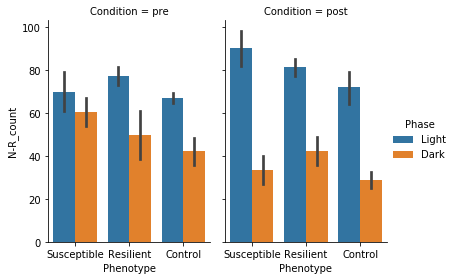

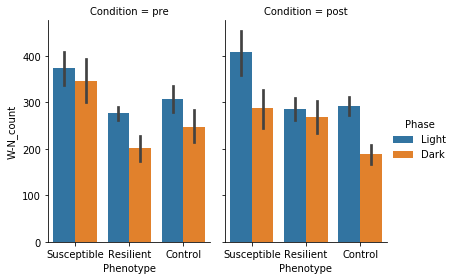

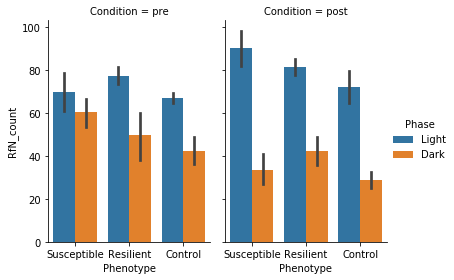

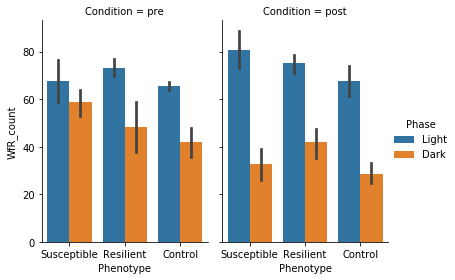

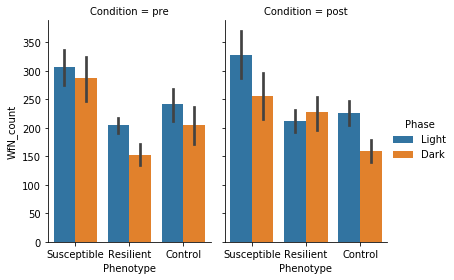

In [11]:
Trans_state =[ 'N-W_count','N-R_count','W-N_count','RfN_count','WfR_count','WfN_count']

for trans in Trans_state:
    g = sns.catplot(x='Phenotype',y = trans,
                hue = 'Phase', col = 'Condition',
                data = df_res, kind ="bar",
                height = 4, aspect = .7, ci =68) # standard error ci = 68 .. before it was showing standard deviation
    

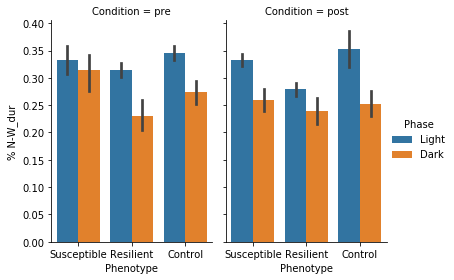

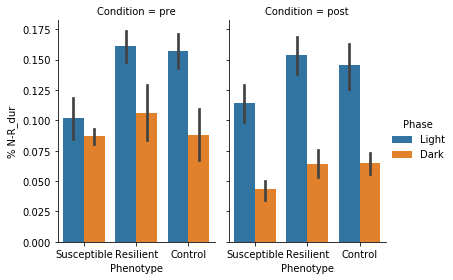

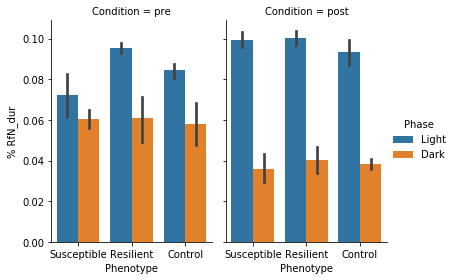

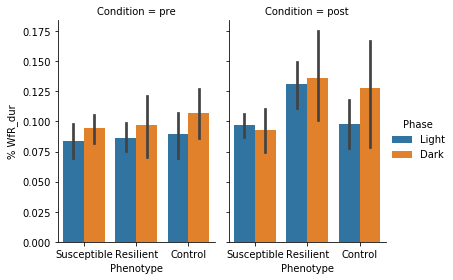

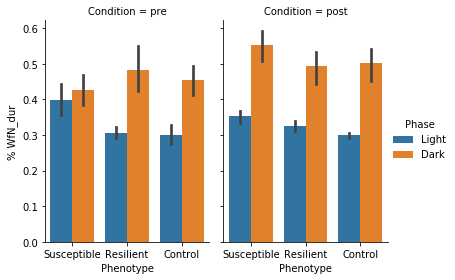

In [12]:
Trans_state =['% N-W_dur','% N-R_dur','% RfN_dur','% WfR_dur','% WfN_dur']
for trans in Trans_state:
    g = sns.catplot(x='Phenotype',y = trans,
                hue = 'Phase', col = 'Condition',
                data = df_res, kind ="bar",
                height = 4, aspect = .7, ci =68) # standard error ci = 68 .. before it was showing standard deviation
    

# Poisson Distribution of the state transitions counts
TBC

# These findings can be summarized as following:  
- There is an increased competition from the wake circuitry in the suceptible mice pre-and post- exposure to stress. Such heightened competition leads to increased occurrence of shorter "NREM"to wake, "NREM"to REM and "REM"to wake bouts duration. In other words, NREM state and REM state switch 'earlier" to Wake state. Even when NREM switches to REM state, the increased competition from the wake circuitry leads to increased switching from the sleep (NREM then REM) to wake and therefore the sleep (NREM state followed by REM state) switch 'earlier' to Wake state.

- There is an increased competition from the wake circuitry in the resilient mice post exposure to stress during the dark as there is a shift in the distribution of duration of the "NREM"to wake, "NREM"to REM and "REM"to wake bouts to the left.

It is worth mentioning that the distribution of the Wake states, "Wake" from REM and "Wake" from NREM is comparable between the phenotypes. The way 


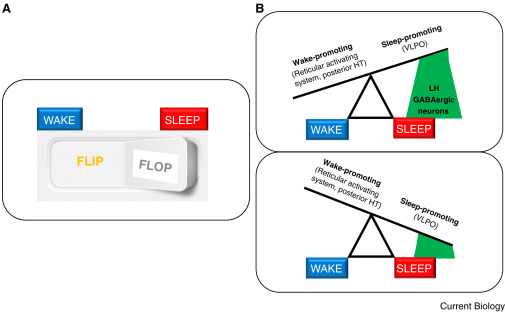

From: https://www.sciencedirect.com/science/article/pii/S096098221630700X

Survival Analysis is then used in order to exploring the "survival" of NREM states and REM state pre- and post-exposure to stress.

# Survival Analysis

In [123]:
# Function to plot Light and Dark Survival Curve Pre and Post exposure to Chronic Stress

def plot_surv_curves(state, direction, transition,measure):

    for condition in ['pre','post']:
        P_l =[]
        E_l = []
        T_l = []
    
        for phase in ['Light','Dark']: 
            P_l = []
            E_l = []
            T_l = []

            for phenotype in ['Susceptible','Resilient','Control']:
                df = load_data(phenotype,phase,condition)    
                df_grouped = grouping_data(df,direction,measure) 
                Dur_l = extract_list(df_grouped,state,transition) 
                events_l = [1]*len(Dur_l)
                phenotype_l = [phenotype]*len(Dur_l)
                T_l.extend(Dur_l)
                E_l.extend(events_l)
                P_l.extend(phenotype_l)
        
                data =  {'Epoch_Duration': T_l,
                         'Events': E_l ,
                         'Phenotype': P_l}
        
            data_df = pd.DataFrame({ key:pd.Series(value) for key, value in data.items() })

            T = data_df['Epoch_Duration']
            E = data_df['Events']
        
            groups = data_df['Phenotype']
            ix1 = (groups == 'Susceptible')
            ix2 = (groups == 'Resilient')
            ix3 = (groups == 'Control')
        
            kmf= KaplanMeierFitter()

            kmf.fit(T[ix1], E[ix1], label='Susceptible')
            ax = plt.subplots()
            ax = kmf.plot()
            #ax.set_yscale('log')
            ax.set_xlim([0,300])
            ax.set_title(condition + phase + transition)

            kmf.fit(T[ix2], E[ix2], label='Resilient')
            ax1 = kmf.plot(ax = ax)

            kmf.fit(T[ix3], E[ix3], label='Control')
            kmf.plot(ax = ax1)


In [127]:
from lifelines.statistics import logrank_test


def compute_logrank(state, direction, phase,condition, transition,measure):

    for phenotype in ['Susceptible','Resilient','Control']:
        df = load_data(phenotype,phase,condition)    
        df_grouped = grouping_data(df,direction,measure) 
        Dur_l = extract_list(df_grouped,state,transition) 
        events_l = [1]*len(Dur_l)
        phenotype_l = [phenotype]*len(Dur_l)
        T_l.extend(Dur_l)
        E_l.extend(events_l)
        P_l.extend(phenotype_l)
        
        data =  {'Epoch_Duration': T_l,
                 'Events': E_l ,
                 'Phenotype': P_l}
        
        data_df = pd.DataFrame({ key:pd.Series(value) for key, value in data.items() })

        T = data_df['Epoch_Duration']
        E = data_df['Events']
        
        groups = data_df['Phenotype']
        ix1 = (groups == 'Susceptible')
        ix2 = (groups == 'Resilient')
        ix3 = (groups == 'Control')
        
        
            
        results = logrank_test(T[ix1],T[ix3],E[ix1],E[ix3]) # comparison between S&C
        results1 = logrank_test(T[ix1],T[ix2],E[ix1],E[ix2]) # Comparison between S&R
        results2 = logrank_test(T[ix2],T[ix3],E[ix2],E[ix3]) # Comparison between R&C
            
        return results.print_summary(),results1.print_summary(),results2.print_summary() 

In [128]:
#logrank_test

phase = 'Dark'
condition = 'post'
direction ='From'
state = 'REM'
transition = 'RfN'

compute_logrank(state, direction, phase,condition, transition,measure)

(None, None, None)

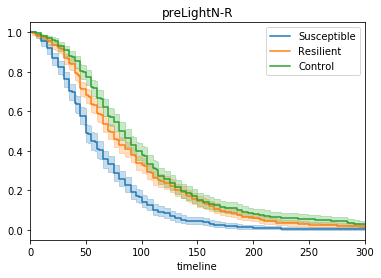

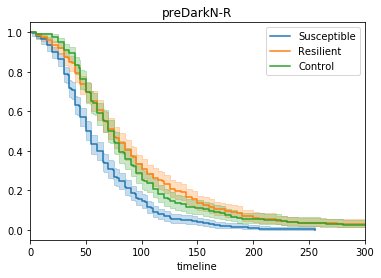

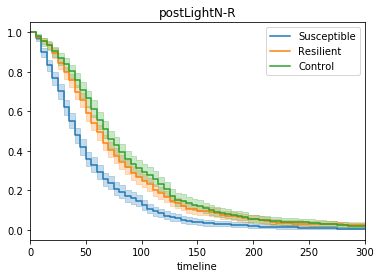

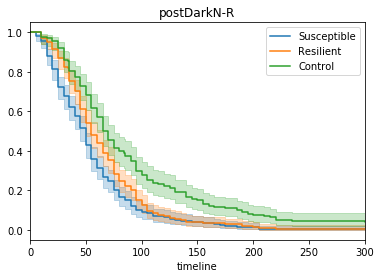

In [124]:
measure = 'Duration'
direction ='To'
state = 'NREM'
transition = 'N-R'

plot_surv_curves(state, direction, transition,measure)


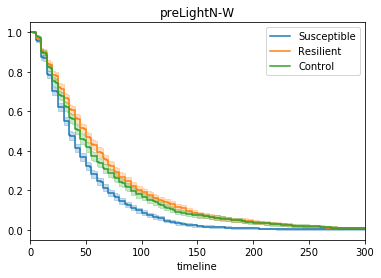

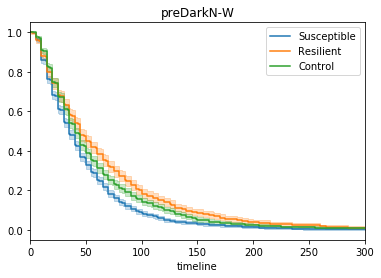

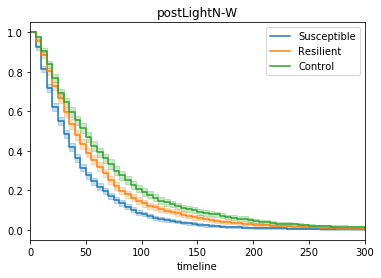

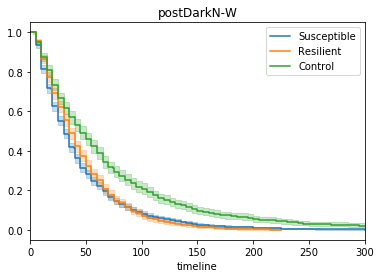

In [103]:
direction ='To'
state = 'NREM'
transition = 'N-W'

plot_surv_curves(state, direction, transition,measure)

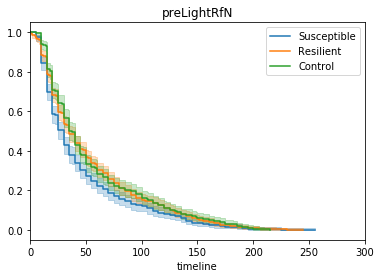

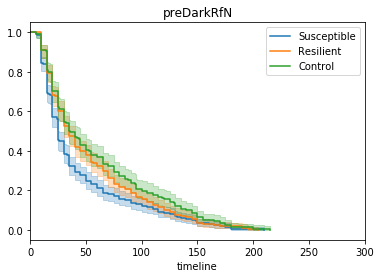

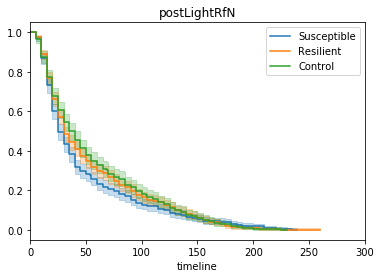

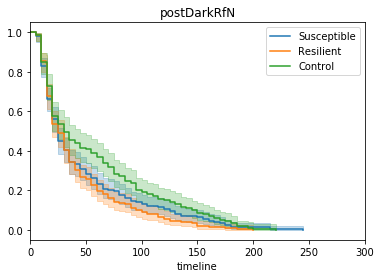

In [104]:
direction ='From'
state = 'REM'
transition = 'RfN'

plot_surv_curves(state, direction, transition,measure)

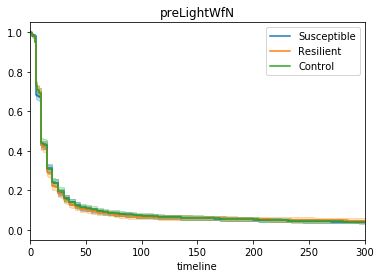

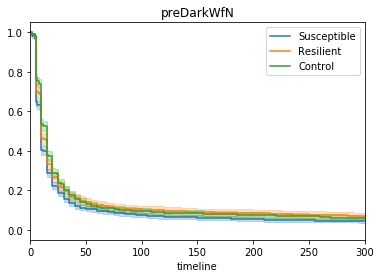

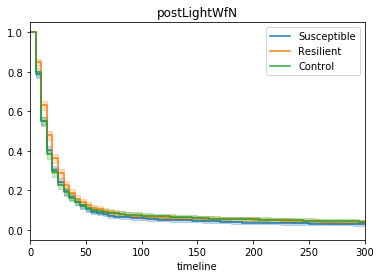

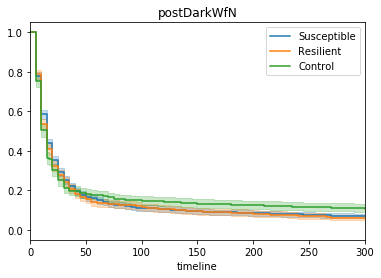

In [105]:
direction ='From'
state = 'Wake'
transition = 'WfN'

plot_surv_curves(state, direction, transition,measure)


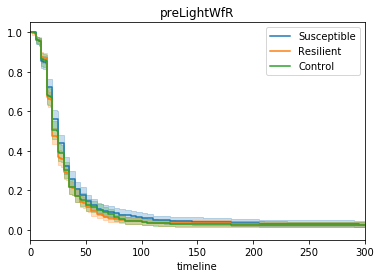

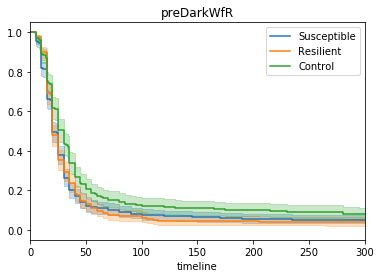

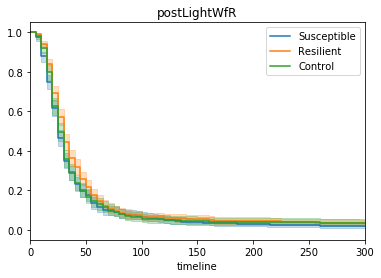

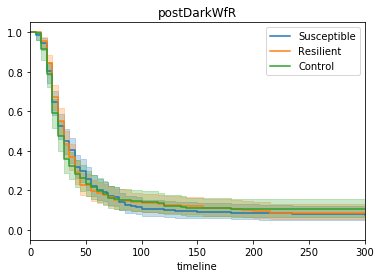

In [106]:
direction ='From'
state = 'Wake'
transition = 'WfR'

plot_surv_curves(state, direction, transition,measure)


# Cox Proportional Hazard Model
To model the impact of covariates on the survival curve

Covariates: 
- condition: pre and post
- phase: light and dark
- Susceptiblity to stress versus Resilience
- Vulnerability to stress


# Hidden Markov Model
Aim: To model the sequence of sleep and wake states sequence